17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 - 1s - 15ms/step - accuracy: 0.5645 - loss: 0.6842 - val_accuracy: 0.7499 - val_loss: 0.6209
Epoch 2/20
49/49 - 0s - 3ms/step - accuracy: 0.6871 - loss: 0.5924 - val_accuracy: 0.8251 - val_loss: 0.4856
Epoch 3/20
49/49 - 0s - 3ms/step - accuracy: 0.7671 - loss: 0.5049 - val_accuracy: 0.8448 - val_loss: 0.3968
Epoch 4/20
49/49 - 0s - 3ms/step - accuracy: 0.8076 - loss: 0.4482 - val_accuracy: 0.8547 - val_loss: 0.3581
Epoch 5/20
49/49 - 0s - 2ms/step - accuracy: 0.8243 - loss: 0.4139 - val_accuracy: 0.8575 - val_loss: 0.3389
Epoch 6/20
49/49 - 0s - 2ms/step - accuracy: 0.8401 - loss: 0.3912 - val_accuracy: 0.8587 - val_loss: 0.3326
Epoch 7/20
49/49 - 0s - 2ms/step - accuracy: 0.8472 - loss: 0.3758 - val_accuracy: 0.8600 - val_loss: 0.3271
Epoch 8/20
49/49 - 0s - 3ms/step - accuracy: 0.8514 - loss: 0.3637 - val_accuracy: 0.8606 - val_loss: 0.3266
Epoch 9/20
49/49 - 0s - 3ms/step - accuracy: 0.8603 - loss: 0.3507 - val_accuracy: 0.8578 - val_loss: 0.3246
Epoch 10/20
49/49 - 0s - 3ms/

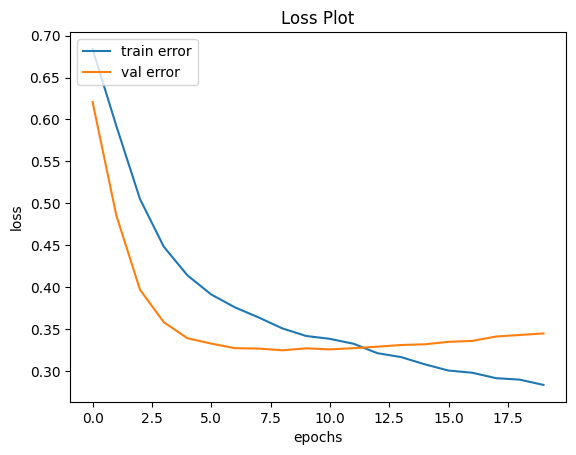

In [1]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()